In [76]:
# import required packages
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, mean_squared_error, precision_recall_curve, PrecisionRecallDisplay,RocCurveDisplay, DetCurveDisplay
import matplotlib.pyplot as plt  # For creating plots
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from sklearn.inspection import DecisionBoundaryDisplay

**Question 1**: Load the hotel reservations dataset (hotel_res.csv) using numpy. This is a classification dataset and the last column represents the actual class labels. Build SVM classifier using this dataset before and after normalization. This is an example where we would use the paired T-test. Use Paired T-Test to compare the impact of normalisation.

In [14]:
hr = np.genfromtxt('hotel_res.csv', delimiter=',')

In [15]:
# normalize the dataset to the range [0, 1]
mms = MinMaxScaler()
hr_norm = mms.fit_transform(hr[:, :-1])

In [16]:
# svm performance on the dataset without normalisation
svc = SVC()
scores = cross_val_score(svc, hr[:, :-1], hr[:, -1])

In [20]:
scores

array([0.76802205, 0.76554101, 0.76154376, 0.76567884, 0.75961406])

In [17]:
# svm performance on the dataset after normalisation
svc = SVC()
scores_norm = cross_val_score(svc, hr_norm[:, :-1], hr[:, -1])

In [21]:
scores_norm

array([0.77767057, 0.7789111 , 0.77808408, 0.77904893, 0.77188146])

In [18]:
# Paired T-test
ttest_rel(scores, scores_norm)

Ttest_relResult(statistic=-11.764494912684226, pvalue=0.0002986917135999569)

**Question 2**: Use 1-sample T-test to check if the performance of the SVM classifier after normalisation is greater than 75%.

In [23]:
ttest_1samp(scores_norm, 0.75)

Ttest_1sampResult(statistic=20.325673525591878, pvalue=3.4593589727903743e-05)

**Question 3**: Load the version of the hotel reservations dataset in the file *hotel_res_missing.csv*. Use the SimpleImputer to replace missing data in the dataset with the mean value. Build the model again using SVM and compare its performance with the model built in *Question 1*.

In [24]:
# load the dataset
hr_missing = np.genfromtxt('hotel_res_missing.csv', delimiter=',')

In [25]:
# Check the count of missing values in each column
np.sum(np.isnan(hr_missing), axis=0)

array([364, 355, 355, 344, 343, 350, 369, 386, 327, 350, 342, 362, 386,
       339, 331, 334, 335,   0])

In [27]:
# Use SimpleImputer to replace the missing values
imp_mean = SimpleImputer()
hr_imp = imp_mean.fit_transform(hr_missing)

In [29]:
# Check the missing values in each column after imputation
np.sum(np.isnan(hr_imp), axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(hr_imp[:, :-1], hr[:, -1], test_size=0.2)

In [32]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.7594762232942798

**Question 4**: Use the KNNImputer to replace missing data in the dataset loaded in *Question 3*. Build the model again using SVM and compare its performance with the models built in *Question 1* and *Question 3*.

In [33]:
knn_imputer = KNNImputer()
hr_knn_imputed = knn_imputer.fit_transform(hr_missing)

In [31]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(hr_knn_imputed[:, :-1], hr_knn_imputed[:, -1], test_size=0.2)

In [ ]:
svc = SVC()
svc.fit(x_train2, y_train2)
svc.score(x_test2, y_test2)

**Question 5**: Use the pearson correlation method we experimented in Week 4 to identify two most important features in the dataset obtained after *Question 4*. Build a SVM model and visualize the results using [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay).

In [36]:
sel_kbest = SelectKBest(r_regression, k=2)
hr_knn_imputed2 = sel_kbest.fit_transform(hr_knn_imputed[:, :-1], hr_knn_imputed[:, -1])

In [47]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(hr_knn_imputed2, hr_knn_imputed[:, -1], test_size=0.2)

In [48]:
svc = SVC()
svc.fit(x_train3, y_train3)
svc.score(x_test3, y_test3)

0.6807718814610614

In [56]:
y_pred = svc.predict(x_test3)

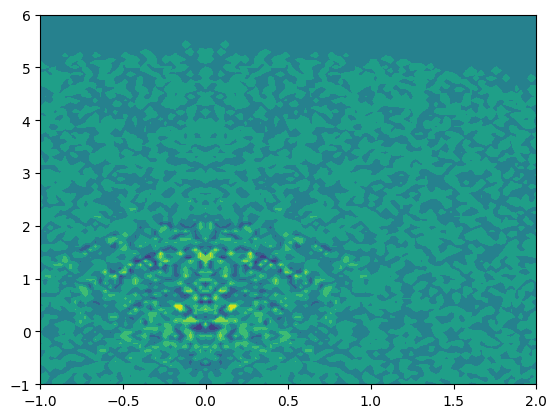

In [61]:
dec_bound_disp = DecisionBoundaryDisplay.from_estimator(svc, x_test3, grid_resolution=100)

**Note**: The DecisionBoundaryDisplay doesn't look very good (compare this plot to the [DecisionBoundaryDisplay for the iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator). This was happening for me because the dataset is highly imbalanced. And, when I looked at the prediction, they were all *Class 1* for the model. You can try to improve by handling the imbalance better and hyperparameter optimization.

**Question 6**: For this question, use the dataset obtained in *Question 4*. Build an SVM model and plot the [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay) for the model.

In [66]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(hr_knn_imputed[:, :-1], hr_knn_imputed[:, -1], test_size=0.2)

In [67]:
svc = SVC()
svc.fit(x_train2, y_train2)

SVC()

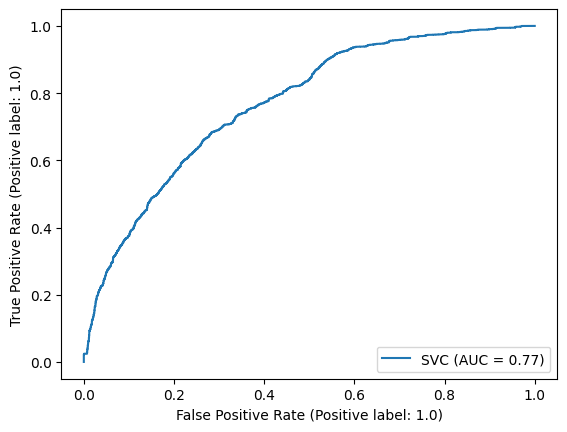

In [69]:
RocCurveDisplay.from_estimator(svc, x_test2, y_test2)

**Question 7**: For this question, use the dataset obtained in *Question 4*. Build an SVM model and plot the [DET curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DetCurveDisplay.html#sklearn.metrics.DetCurveDisplay) for the model.

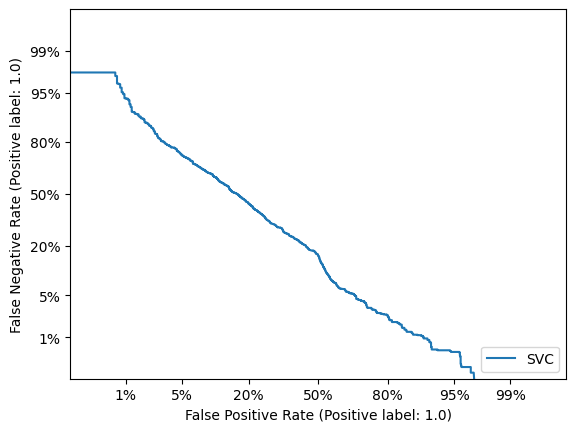

In [77]:
DetCurveDisplay.from_estimator(svc, x_test2, y_test2)